# About

In this programming assignment you will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](https://github.com/hse-aml/hadron-collider-machine-learning/blob/master/week2/pic/pid.jpg?raw=1)

You task is to identify a particle type using the responses in the detector systems. 

# Attention

Data files you should download from https://github.com/hse-aml/hadron-collider-machine-learning/releases/tag/Week_2

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import utils

# Download data

Download data used to train classifiers.

### Read training file

In [0]:
data = pandas.read_csv("https://github.com/hse-aml/hadron-collider-machine-learning/releases/download/Week_2/training.csv.gz")#('training.csv.gz')

In [0]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,TrackQualitySubdetector2,FlagPrs,DLLelectron,DLLkaon,EcalE,TrackQualityPerNDoF,DLLproton,PrsDLLbeElectron,FlagRICH1,MuonLLbeBCK,FlagHcal,EcalShowerLongitudinalParameter,Calo2dFitQuality,TrackPt,TrackDistanceToZ,RICHpFlagPion,HcalDLLbeElectron,Calo3dFitQuality,FlagEcal,MuonLLbeMuon,TrackNDoFSubdetector1,RICHpFlagProton,RICHpFlagKaon,GhostProbability,TrackQualitySubdetector1,Label,RICH_DLLbeBCK,FlagRICH2,FlagBrem,HcalDLLbeMuon,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,17.585680,1.0,-6.411697,-7.213295,0.000001,1.467550,-26.667494,-2.730674,1.0,-5.152923,1.0,-999.000000,19.954819,3141.930677,0.613640,1.0,-0.909544,-999.000000,1.0,-0.661823,4.0,1.0,1.0,0.018913,5.366212,Muon,-21.913000,1.0,1.0,1.015345,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,20.230680,1.0,5.453014,0.000006,1531.542000,3.570540,-0.711194,1.773806,1.0,-999.000000,0.0,33.187644,0.037601,199.573653,0.465480,1.0,0.434909,13.667366,1.0,-999.000000,10.0,0.0,0.0,0.351206,9.144749,Ghost,-0.703617,0.0,1.0,-2.394644,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,11.619878,0.0,-999.000000,-999.000000,-999.000000,0.826442,-999.000000,-999.000000,0.0,-999.000000,0.0,-999.000000,-999.000000,94.829418,0.241891,0.0,-999.000000,-999.000000,0.0,-999.000000,5.0,0.0,0.0,0.195717,1.459992,Ghost,-999.000000,0.0,0.0,-999.000000,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,15.336305,1.0,-10.616585,-39.447507,4385.688000,1.076721,-29.291509,-3.053104,1.0,-999.000000,1.0,231.190351,2.839508,808.631064,0.680705,1.0,-1.504160,1939.259641,1.0,-999.000000,9.0,0.0,1.0,0.003972,22.950573,Pion,-47.223118,1.0,1.0,-0.321242,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,10.954629,1.0,-8.144945,26.050386,1220.930044,0.439767,21.386587,-2.730648,1.0,-999.000000,1.0,-794.866475,1.209193,1422.569214,0.575066,1.0,-1.576249,1867.165142,1.0,-999.000000,5.0,0.0,0.0,0.015232,3.516173,Proton,15.304688,0.0,1.0,-1.038026,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is left by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is left by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

### Look at the labels set

The training data contains six classes. Each class corresponds to a particle type. Your task is to predict type of a particle.

In [0]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

Convert the particle types into class numbers.

In [0]:
data['Class'] = utils.get_class_ids(data.Label.values)
set(data.Class)

{0, 1, 2, 3, 4, 5}

### Define training features

The following set of features describe particle responses in the detector systems:

![features](https://github.com/hse-aml/hadron-collider-machine-learning/blob/master/week2/pic/features.jpeg?raw=1)

Also there are several combined features. The full list is following.

In [0]:
features = list(set(data.columns) - {'Label', 'Class'})
features

['TrackQualitySubdetector2',
 'EcalE',
 'FlagRICH2',
 'RICHpFlagPion',
 'RICH_DLLbeKaon',
 'FlagRICH1',
 'TrackP',
 'TrackNDoF',
 'TrackPt',
 'RICHpFlagMuon',
 'FlagSpd',
 'PrsDLLbeElectron',
 'MuonLLbeBCK',
 'RICHpFlagProton',
 'HcalDLLbeElectron',
 'MuonFlag',
 'SpdE',
 'EcalShowerLongitudinalParameter',
 'RICHpFlagKaon',
 'RICH_DLLbeProton',
 'RICH_DLLbeElectron',
 'RICH_DLLbeMuon',
 'PrsE',
 'DLLmuon',
 'HcalE',
 'EcalDLLbeMuon',
 'RICHpFlagElectron',
 'EcalDLLbeElectron',
 'FlagEcal',
 'DLLkaon',
 'FlagMuon',
 'TrackNDoFSubdetector2',
 'Calo2dFitQuality',
 'FlagHcal',
 'MuonLooseFlag',
 'MuonLLbeMuon',
 'RICH_DLLbeBCK',
 'TrackNDoFSubdetector1',
 'BremDLLbeElectron',
 'TrackQualityPerNDoF',
 'DLLelectron',
 'DLLproton',
 'TrackDistanceToZ',
 'FlagPrs',
 'TrackQualitySubdetector1',
 'HcalDLLbeMuon',
 'GhostProbability',
 'FlagBrem',
 'Calo3dFitQuality']

### Divide training data into 2 parts

In [0]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.90)

In [0]:
len(training_data), len(validation_data)

(1080000, 120000)

# Sklearn classifier

On this step your task is to train **Sklearn** classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can.

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
%%time 
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, subsample=0.3, random_state=13,
                                min_samples_leaf=100, max_depth=3)
gb.fit(training_data[features].values, training_data.Class.values)

CPU times: user 23min 54s, sys: 2.41 s, total: 23min 56s
Wall time: 23min 57s


### Log loss on the cross validation sample

In [0]:
# predict each track
proba_gb = gb.predict_proba(validation_data[features].values)

In [0]:
log_loss(validation_data.Class.values, proba_gb)

0.6656012851754661

In [0]:
log_loss(validation_data.Class.values, proba_gb)

0.66903316252217382

# Keras neural network

On this step your task is to train **Keras** NN classifier to provide lower **log loss** value.


TASK: your task is to tune the classifier parameters to achieve the lowest **log loss** value on the validation sample you can. Data preprocessing may help you to improve your score.

In [0]:
#preprocessing
training_data[features].describe().T

,count,mean,std,min,25%,50%,75%,max
TrackQualitySubdetector2,1080000.0,16.094971,7.769702,0.000323,10.710930,15.244832,20.410933,1.048634e+02
EcalE,1080000.0,2346.141119,5709.488447,-999.000000,-0.000003,659.904000,3001.511956,3.156805e+05
FlagRICH2,1080000.0,0.501671,0.499997,0.000000,0.000000,1.000000,1.000000,1.000000e+00
RICHpFlagPion,1080000.0,0.858654,0.348379,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RICH_DLLbeKaon,1080000.0,-51.903222,215.456927,-999.000000,-14.696961,-0.000001,8.457116,1.588015e+02
FlagRICH1,1080000.0,0.832513,0.373410,0.000000,1.000000,1.000000,1.000000,1.000000e+00
TrackP,1080000.0,16132.643880,27539.209400,1115.380004,4135.297358,8064.074938,17495.495117,4.673862e+06
TrackNDoF,1080000.0,29.423146,6.026995,7.000000,26.000000,30.000000,34.000000,5.200000e+01
TrackPt,1080000.0,928.285192,1605.475729,1.447011,268.400677,546.090602,1110.806019,4.271570e+05
RICHpFlagMuon,1080000.0,0.918678,0.273329,0.000000,1.000000,1.000000,1.000000,1.000000e+00


In [0]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,TrackQualitySubdetector2,FlagPrs,DLLelectron,DLLkaon,EcalE,TrackQualityPerNDoF,DLLproton,PrsDLLbeElectron,FlagRICH1,MuonLLbeBCK,FlagHcal,EcalShowerLongitudinalParameter,Calo2dFitQuality,TrackPt,TrackDistanceToZ,RICHpFlagPion,HcalDLLbeElectron,Calo3dFitQuality,FlagEcal,MuonLLbeMuon,TrackNDoFSubdetector1,RICHpFlagProton,RICHpFlagKaon,GhostProbability,TrackQualitySubdetector1,Label,RICH_DLLbeBCK,FlagRICH2,FlagBrem,HcalDLLbeMuon,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,Class
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,17.585680,1.0,-6.411697,-7.213295,0.000001,1.467550,-26.667494,-2.730674,1.0,-5.152923,1.0,-999.000000,19.954819,3141.930677,0.613640,1.0,-0.909544,-999.000000,1.0,-0.661823,4.0,1.0,1.0,0.018913,5.366212,Muon,-21.913000,1.0,1.0,1.015345,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400,3
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,20.230680,1.0,5.453014,0.000006,1531.542000,3.570540,-0.711194,1.773806,1.0,-999.000000,0.0,33.187644,0.037601,199.573653,0.465480,1.0,0.434909,13.667366,1.0,-999.000000,10.0,0.0,0.0,0.351206,9.144749,Ghost,-0.703617,0.0,1.0,-2.394644,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017,1
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,11.619878,0.0,-999.000000,-999.000000,-999.000000,0.826442,-999.000000,-999.000000,0.0,-999.000000,0.0,-999.000000,-999.000000,94.829418,0.241891,0.0,-999.000000,-999.000000,0.0,-999.000000,5.0,0.0,0.0,0.195717,1.459992,Ghost,-999.000000,0.0,0.0,-999.000000,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000,1
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,15.336305,1.0,-10.616585,-39.447507,4385.688000,1.076721,-29.291509,-3.053104,1.0,-999.000000,1.0,231.190351,2.839508,808.631064,0.680705,1.0,-1.504160,1939.259641,1.0,-999.000000,9.0,0.0,1.0,0.003972,22.950573,Pion,-47.223118,1.0,1.0,-0.321242,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519,4
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,10.954629,1.0,-8.144945,26.050386,1220.930044,0.439767,21.386587,-2.730648,1.0,-999.000000,1.0,-794.866475,1.209193,1422.569214,0.575066,1.0,-1.576249,1867.165142,1.0,-999.000000,5.0,0.0,0.0,0.015232,3.516173,Proton,15.304688,0.0,1.0,-1.038026,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087,5


In [0]:
unique_ser=training_data[features].nunique()

In [0]:
numeric_cols=list(unique_ser[unique_ser>2].index)
category_cols=list(unique_ser.index.difference(numeric_cols))
print(numeric_cols)
print(category_cols)

['TrackQualitySubdetector2', 'EcalE', 'RICH_DLLbeKaon', 'TrackP', 'TrackNDoF', 'TrackPt', 'PrsDLLbeElectron', 'MuonLLbeBCK', 'HcalDLLbeElectron', 'SpdE', 'EcalShowerLongitudinalParameter', 'RICH_DLLbeProton', 'RICH_DLLbeElectron', 'RICH_DLLbeMuon', 'PrsE', 'DLLmuon', 'HcalE', 'EcalDLLbeMuon', 'EcalDLLbeElectron', 'DLLkaon', 'TrackNDoFSubdetector2', 'Calo2dFitQuality', 'MuonLLbeMuon', 'RICH_DLLbeBCK', 'TrackNDoFSubdetector1', 'BremDLLbeElectron', 'TrackQualityPerNDoF', 'DLLelectron', 'DLLproton', 'TrackDistanceToZ', 'TrackQualitySubdetector1', 'HcalDLLbeMuon', 'GhostProbability', 'Calo3dFitQuality']
['FlagBrem', 'FlagEcal', 'FlagHcal', 'FlagMuon', 'FlagPrs', 'FlagRICH1', 'FlagRICH2', 'FlagSpd', 'MuonFlag', 'MuonLooseFlag', 'RICHpFlagElectron', 'RICHpFlagKaon', 'RICHpFlagMuon', 'RICHpFlagPion', 'RICHpFlagProton']


In [0]:
import numpy as np
training_data_pro=training_data[features].replace(-999,np.NaN)
(training_data[features]==-999).sum()

TrackQualitySubdetector2                0
EcalE                              197103
FlagRICH2                               0
RICHpFlagPion                           0
RICH_DLLbeKaon                      52485
FlagRICH1                               0
TrackP                                  0
TrackNDoF                               0
TrackPt                                 0
RICHpFlagMuon                           0
FlagSpd                                 0
PrsDLLbeElectron                   160764
MuonLLbeBCK                        874165
RICHpFlagProton                         0
HcalDLLbeElectron                  253990
MuonFlag                                0
SpdE                               158678
EcalShowerLongitudinalParameter    323176
RICHpFlagKaon                           0
RICH_DLLbeProton                    52485
RICH_DLLbeElectron                  52485
RICH_DLLbeMuon                      52485
PrsE                               160764
DLLmuon                           

In [0]:
training_data_pro.isna().sum()

TrackQualitySubdetector2                0
EcalE                              197103
FlagRICH2                               0
RICHpFlagPion                           0
RICH_DLLbeKaon                      52485
FlagRICH1                               0
TrackP                                  0
TrackNDoF                               0
TrackPt                                 0
RICHpFlagMuon                           0
FlagSpd                                 0
PrsDLLbeElectron                   160764
MuonLLbeBCK                        874165
RICHpFlagProton                         0
HcalDLLbeElectron                  253990
MuonFlag                                0
SpdE                               158678
EcalShowerLongitudinalParameter    323176
RICHpFlagKaon                           0
RICH_DLLbeProton                    52485
RICH_DLLbeElectron                  52485
RICH_DLLbeMuon                      52485
PrsE                               160764
DLLmuon                           

In [0]:
training_data_pro.fillna(training_data_pro.mean(),inplace=True)
#train_data_pro.isna().sum()
validation_data_pro=validation_data[features].replace(-999,np.NaN)
validation_data_pro.fillna(training_data_pro.mean(),inplace=True)
validation_data_pro.describe().T

,count,mean,std,min,25%,50%,75%,max
TrackQualitySubdetector2,120000.0,16.099989,7.780691,0.009542,10.713958,1.524178e+01,20.370657,9.517091e+01
EcalE,120000.0,3090.891177,5597.480802,-187.383999,442.728006,2.223644e+03,3092.929646,2.747424e+05
FlagRICH2,120000.0,0.504875,0.499978,0.000000,0.000000,1.000000e+00,1.000000,1.000000e+00
RICHpFlagPion,120000.0,0.860750,0.346209,0.000000,1.000000,1.000000e+00,1.000000,1.000000e+00
RICH_DLLbeKaon,120000.0,-3.526764,24.582277,-186.768501,-9.737481,-8.472066e-07,8.536728,1.439023e+02
FlagRICH1,120000.0,0.832017,0.373853,0.000000,1.000000,1.000000e+00,1.000000,1.000000e+00
TrackP,120000.0,16222.387864,30991.428387,1118.740000,4160.482662,8.112835e+03,17553.017086,4.750951e+06
TrackNDoF,120000.0,29.413742,6.048621,7.000000,26.000000,3.000000e+01,34.000000,4.900000e+01
TrackPt,120000.0,927.719268,1442.192371,2.464311,270.851345,5.473745e+02,1108.617702,1.861411e+05
RICHpFlagMuon,120000.0,0.919325,0.272336,0.000000,1.000000,1.000000e+00,1.000000,1.000000e+00


In [0]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
for col in numeric_cols:
  std_scaler.fit(training_data_pro[col].values.reshape(-1, 1))
  training_data_pro[col]=std_scaler.transform(training_data_pro[col].values.reshape(-1, 1))
  validation_data_pro[col]=std_scaler.transform(validation_data_pro[col].values.reshape(-1, 1))

In [0]:
validation_data_pro.describe().T

,count,mean,std,min,25%,50%,75%,max
TrackQualitySubdetector2,120000.0,0.000646,1.001415,-2.070277,-6.925640e-01,-1.098098e-01,5.503027e-01,10.177479
EcalE,120000.0,-0.000372,1.020255,-0.597904,-4.830531e-01,-1.584450e-01,1.539376e-12,49.513633
FlagRICH2,120000.0,0.504875,0.499978,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000
RICHpFlagPion,120000.0,0.860750,0.346209,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
RICH_DLLbeKaon,120000.0,-0.000033,1.000500,-7.457983,-2.528097e-01,1.435063e-01,4.909517e-01,6.000338
FlagRICH1,120000.0,0.832017,0.373853,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
TrackP,120000.0,0.003259,1.125357,-0.545183,-4.347317e-01,-2.912143e-01,5.157642e-02,171.930155
TrackNDoF,120000.0,-0.001560,1.003589,-3.720454,-5.679693e-01,9.571171e-02,7.593927e-01,3.248196
TrackPt,120000.0,-0.000352,0.898296,-0.576665,-4.094949e-01,-2.372573e-01,1.123235e-01,115.363248
RICHpFlagMuon,120000.0,0.919325,0.272336,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000


In [0]:
#all data preprocessing
%time

#data_pro=data.replace(-999,np.NaN)
#data_pro.fillna(data_pro.mean(),inplace=True)
#data_pro.isna().sum()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


In [0]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
def nn_model(input_dim):
    model = Sequential()
    model.add(Dense(510, input_dim=input_dim))
    model.add(Activation('tanh'))
    
    model.add(Dense(510, input_dim=input_dim))
    model.add(Activation('tanh'))
    
    model.add(Dense(256, input_dim=input_dim))
    model.add(Activation('tanh'))
    
    model.add(Dense(256, input_dim=input_dim))
    model.add(Activation('tanh'))
    
    model.add(Dense(128, input_dim=input_dim))
    model.add(Activation('tanh'))
    
    model.add(Dense(128, input_dim=input_dim))
    model.add(Activation('tanh'))
    
    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    return model

In [0]:
nn = nn_model(len(features))
nn.fit(training_data_pro[features].values, np_utils.to_categorical(training_data.Class.values), verbose=1, nb_epoch=20, batch_size=256)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
1080000/1080000 [==============================] - 23s 21us/step - loss: 0.6466
Epoch 2/20
1080000/1080000 [==============================] - 23s 21us/step - loss: 0.6167
Epoch 3/20
1080000/1080000 [==============================] - 23s 21us/step - loss: 0.6061
Epoch 4/20
1080000/1080000 [==============================] - 22s 20us/step - loss: 0.5994
Epoch 5/20
1080000/1080000 [==============================] - 22s 20us/step - loss: 0.5955
Epoch 6/20
1080000/1080000 [==============================] - 22s 20us/step - loss: 0.5923
Epoch 7/20
1080000/1080000 [==============================] - 23s 21us/step - loss: 0.5898
Epoch 8/20
1080000/1080000 [==============================] - 22s 21us/step - loss: 0.5877
Epoch 9/20
1080000/1080000 [==============================] - 22s 20us/step - loss: 0.5865
Epoch 10/20
1080000/1080000 [==============================] - 23s 21us/step - loss: 0.5847
Epoch 11/20
1080000/1080000 [==============================] - 22s 20us/step - loss: 0.58

### Log loss on the cross validation sample

In [0]:
# predict each track
proba_nn = nn.predict_proba(validation_data_pro[features].values)

In [0]:
log_loss(validation_data.Class.values, proba_nn)

0.5901139493288416

# Quality metrics

Plot ROC curves and signal efficiency dependece from particle mometum and transverse momentum values.

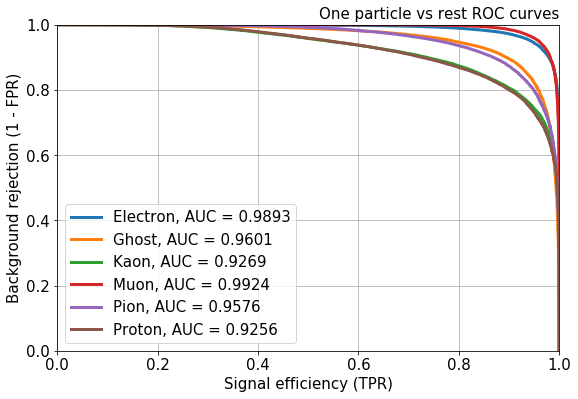

In [0]:
proba = proba_nn
utils.plot_roc_curves(proba, validation_data.Class.values)

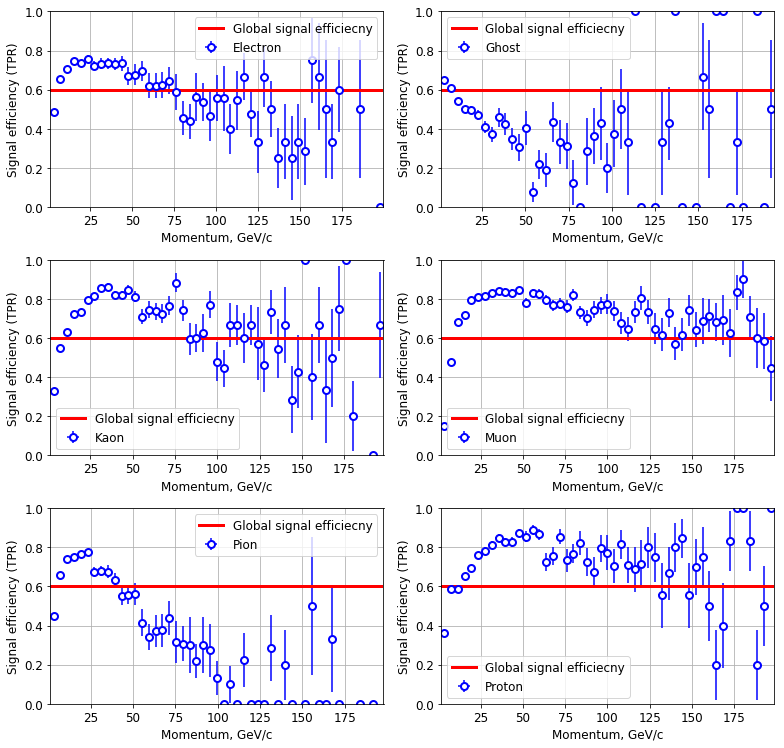

In [0]:
utils.plot_signal_efficiency_on_p(proba, validation_data.Class.values, validation_data.TrackP.values, 60, 50)
plt.show()

# Prepare submission

Select your best classifier and prepare submission file.

In [0]:
test = pandas.read_csv("https://github.com/hse-aml/hadron-collider-machine-learning/releases/download/Week_2/test.csv.gz")#('test.csv.gz')

In [0]:
#test preprocessing
test.describe().T

,count,mean,std,min,25%,50%,75%,max
TrackP,1200000.0,16143.765985,28780.545059,1147.229958,4137.947626,8072.485116,17527.133292,4.969893e+06
TrackNDoFSubdetector2,1200000.0,14.756587,4.034882,1.000000,13.000000,16.000000,18.000000,3.100000e+01
BremDLLbeElectron,1200000.0,-207.966549,405.631868,-999.000000,-0.638951,-0.532901,-0.059340,4.791513e+00
MuonLooseFlag,1200000.0,0.190896,0.393007,0.000000,0.000000,0.000000,0.000000,1.000000e+00
FlagSpd,1200000.0,0.853167,0.353940,0.000000,1.000000,1.000000,1.000000,1.000000e+00
SpdE,1200000.0,-144.413433,354.535315,-999.000000,0.000000,3.200000,3.200000,3.200000e+00
EcalDLLbeElectron,1200000.0,-182.920817,385.557867,-999.000000,-3.000638,-2.315899,0.591863,4.341312e+00
DLLmuon,1200000.0,-12.547294,104.365939,-999.000000,-5.706198,-1.983844,1.665486,1.485153e+01
RICHpFlagElectron,1200000.0,0.951542,0.214733,0.000000,1.000000,1.000000,1.000000,1.000000e+00
EcalDLLbeMuon,1200000.0,-183.096810,385.472763,-999.000000,-3.367627,-1.956060,0.433937,2.153007e+00


In [0]:
#can fit model on whole training dataset
data_pro=data.replace(-999,np.NaN)

In [0]:
test_pro=test.replace(-999,np.NaN)
test_pro.fillna(training_data_pro.mean(),inplace=True)
test_pro.isna().sum()

TrackP                             0
TrackNDoFSubdetector2              0
BremDLLbeElectron                  0
MuonLooseFlag                      0
FlagSpd                            0
SpdE                               0
EcalDLLbeElectron                  0
DLLmuon                            0
RICHpFlagElectron                  0
EcalDLLbeMuon                      0
TrackQualitySubdetector2           0
FlagPrs                            0
DLLelectron                        0
DLLkaon                            0
EcalE                              0
TrackQualityPerNDoF                0
DLLproton                          0
PrsDLLbeElectron                   0
FlagRICH1                          0
MuonLLbeBCK                        0
FlagHcal                           0
EcalShowerLongitudinalParameter    0
Calo2dFitQuality                   0
TrackPt                            0
TrackDistanceToZ                   0
RICHpFlagPion                      0
HcalDLLbeElectron                  0
C

In [0]:
std_scaler=StandardScaler()
for col in numeric_cols:
  std_scaler.fit(test_pro[col].values.reshape(-1,1))
  test_pro[col]=std_scaler.transform(test_pro[col].values.reshape(-1,1))
test_pro.describe().T

,count,mean,std,min,25%,50%,75%,max
TrackP,1200000.0,-2.396378e-16,1.000000,-0.521065,-0.417151,-0.280442,0.048066,1.721215e+02
TrackNDoFSubdetector2,1200000.0,-8.602449e-16,1.000000,-3.409417,-0.435350,0.308166,0.803844,4.025749e+00
BremDLLbeElectron,1200000.0,-3.702240e-16,1.000000,-1.726188,-0.628124,-0.237430,-0.029982,5.147181e+00
MuonLooseFlag,1200000.0,1.908958e-01,0.393007,0.000000,0.000000,0.000000,0.000000,1.000000e+00
FlagSpd,1200000.0,8.531667e-01,0.353940,0.000000,1.000000,1.000000,1.000000,1.000000e+00
SpdE,1200000.0,-7.676916e-15,1.000000,-1.569934,-1.569934,0.636969,0.636969,6.369694e-01
EcalDLLbeElectron,1200000.0,-9.991306e-16,1.000000,-1.304626,-0.974449,-0.001848,0.599477,2.441628e+00
DLLmuon,1200000.0,9.126083e-17,1.000000,-10.515415,-0.750371,-0.056783,0.595088,3.060338e+00
RICHpFlagElectron,1200000.0,9.515417e-01,0.214733,0.000000,1.000000,1.000000,1.000000,1.000000e+00
EcalDLLbeMuon,1200000.0,4.830260e-16,1.000000,-2.552905,-0.945716,0.490435,0.755041,1.803291e+00


In [0]:
best_model = nn

In [0]:
# predict test sample
submit_proba = best_model.predict_proba(test[features])
submit_ids = test.ID

In [0]:
from IPython.display import FileLink
utils.create_solution(submit_ids, submit_proba, filename='submission_file.csv.gz')

/content/submission_file.csv.gz